In [50]:
from fbprophet import Prophet
import pandas as pd

In [51]:
path = '../../Databases/DataScratching/nbp_data/archiwum_tab_a_2012.xls'

In [52]:
currencies = ['1 EUR','1 USD', '1 CHF', '1 UAH', '1 CZK', '1 HRK', '1 RUB', '1 ILS', '1 TRY']

In [53]:
data = pd.read_excel(path, converters = {'Data': pd.to_datetime})
data = data.drop(index = 0)

In [54]:
prophet_data = pd.DataFrame(data, columns = ['Data'] + [currencies[0]]).rename(columns={'Data': 'ds','1 EUR': 'y' })

In [55]:
print(prophet_data)

            ds       y
1   2012-01-02   4.464
2   2012-01-03  4.4597
3   2012-01-04  4.4753
4   2012-01-05  4.5135
5   2012-01-09  4.4902
..         ...     ...
248 2012-12-21  4.0643
249 2012-12-24  4.0696
250 2012-12-27  4.0899
251 2012-12-28  4.0745
252 2012-12-31  4.0882

[252 rows x 2 columns]


In [56]:
m = Prophet()

In [57]:
m.fit(prophet_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
future = m.make_future_dataframe(periods=5)

In [59]:
future.tail()

,ds
252,2013-01-01
253,2013-01-02
254,2013-01-03
255,2013-01-04
256,2013-01-05


In [60]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
252,2013-01-01,4.100470,4.064023,4.135508
253,2013-01-02,4.101537,4.066034,4.136856
254,2013-01-03,4.105481,4.070847,4.140237
255,2013-01-04,4.097393,4.061542,4.133290
256,2013-01-05,4.064737,4.027405,4.103091


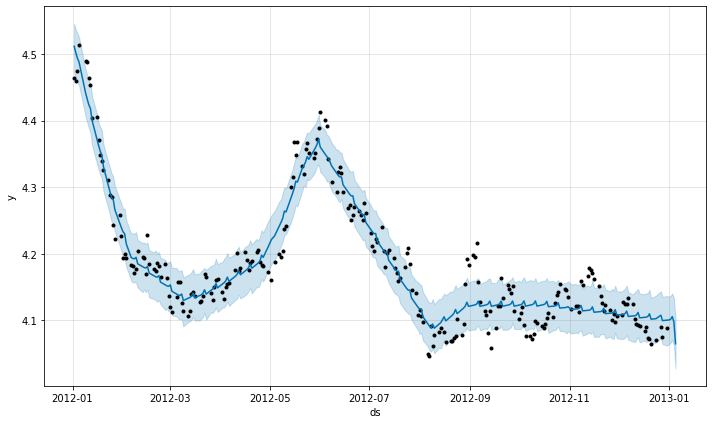

In [61]:
fig1 = m.plot(forecast)

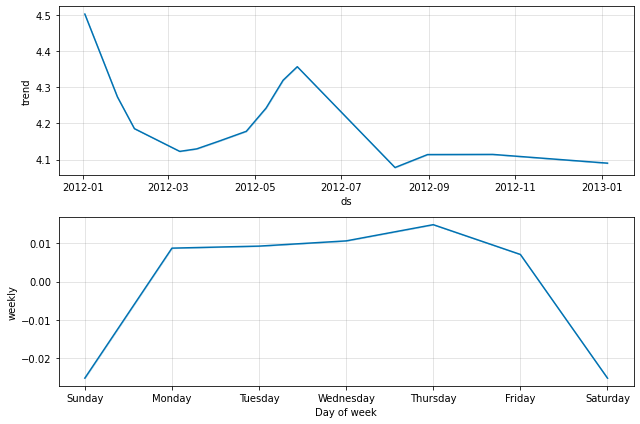

In [62]:
fig2 = m.plot_components(forecast)